# Exploratory Data Analysis

As the first step of our analysis let's load the accident dataset and get an impression of the variables inside.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

Reading the dataset

In [3]:
uk_accident_data = pd.read_csv('C:\\Users\\Dell\\Desktop\\UTD\\OOPS\\UK_Accident.csv')

We will copy the dataframe in a separate variable, so the original data stays intact during the analysis.

In [4]:
data = uk_accident_data.copy()

In [196]:
data.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680,178240,-0.191170,51.489096,1.0,2.0,1.0,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170,181650,-0.211708,51.520075,1.0,3.0,1.0,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520,182240,-0.206458,51.525301,1.0,3.0,2.0,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900,177530,-0.173862,51.482442,1.0,3.0,1.0,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060,179040,-0.156618,51.495752,1.0,3.0,1.0,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [4]:
data.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014
1504149,464696,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


The dataset contains 32 variables most of which are categorical. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15049 entries, 0 to 15048
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   15049 non-null  int64  
 1   Accident_Index                               15049 non-null  object 
 2   Location_Easting_OSGR                        15049 non-null  int64  
 3   Location_Northing_OSGR                       15049 non-null  int64  
 4   Longitude                                    15049 non-null  float64
 5   Latitude                                     15049 non-null  float64
 6   Police_Force                                 15030 non-null  float64
 7   Accident_Severity                            14971 non-null  float64
 8   Number_of_Vehicles                           14974 non-null  float64
 9   Number_of_Casualties                         15049 non-null  int64  
 10

# Missing Values Analysis

The first thing we need to do when we get a new dataset is to evaluate the data quality. Let's get an overview of the missing values.

In [199]:
data.isna().sum()

Unnamed: 0                                       0
Accident_Index                                   0
Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                    19
Accident_Severity                               78
Number_of_Vehicles                              75
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                     41
Time                                             0
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                  52
1st_Road_Number                                 14
Road_Type                                        0
Speed_limit                                      0
Junction_Control               

In [6]:
data.isna().sum().sum()

1070

<AxesSubplot:>

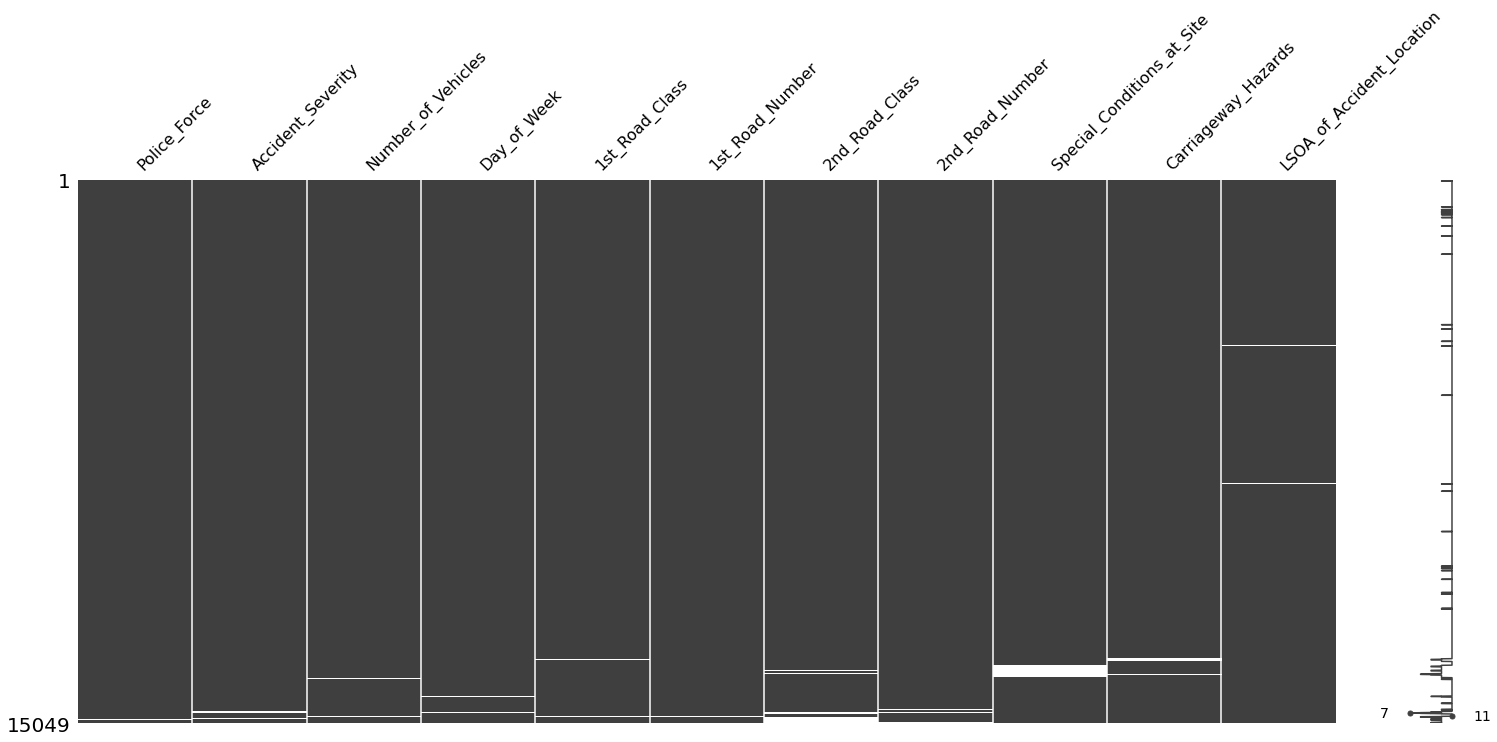

In [201]:
missingdata_df = data.columns[data.isnull().any()].tolist()
msno.matrix(data[missingdata_df])

In [202]:
#Dimensions of dataset
data.shape

(15049, 33)

In [203]:
#number of rows in dataset
data.shape[0]

15049

In [204]:
#percentage of missing values
(data.isna().sum().sum()*100)/data.shape[0]

7.110106983852748

Seven percentage of the data has missing values

In [205]:
#Identifying columns with null values
columns_with_null_values = data.columns[data.isnull().any()]
columns_with_null_values

Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Day_of_Week', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'LSOA_of_Accident_Location'],
      dtype='object')

Filling Null values with median values for numerical data, mode for categorical data

In [206]:
#Columns Police_Force and Number_of_Vehicles have numerical data. 
#Filling null values in these columns with respective median values

data['Police_Force'] = data['Police_Force'].transform(lambda x: x.fillna(x.median()))
data['Number_of_Vehicles'] = data['Number_of_Vehicles'].transform(lambda x: x.fillna(x.median()))

In [207]:
#Columns below have categorical data. 
#Filling null values in these columns with respective mode values

data['Accident_Severity'] = data['Accident_Severity'].transform(lambda x: x.fillna(x.mode()))
data['Day_of_Week'] = data['Day_of_Week'].transform(lambda x: x.fillna(x.mode()))
data['1st_Road_Class'] = data['1st_Road_Class'].transform(lambda x: x.fillna(x.mode()))
data['1st_Road_Number'] = data['1st_Road_Number'].transform(lambda x: x.fillna(x.mode()))
data['2nd_Road_Class'] = data['2nd_Road_Class'].transform(lambda x: x.fillna(x.mode()))
data['2nd_Road_Number'] = data['2nd_Road_Number'].transform(lambda x: x.fillna(x.mode()))
data['Special_Conditions_at_Site'] = data['Special_Conditions_at_Site'].transform(lambda x: x.fillna(x.mode()))
data['Carriageway_Hazards'] = data['Carriageway_Hazards'].transform(lambda x: x.fillna(x.mode()))
data['LSOA_of_Accident_Location'] = data['LSOA_of_Accident_Location'].transform(lambda x: x.fillna(x.mode()))
 

Adding relevant labels to the Categorical variable values for better interpretation of the incoming visualizations

In [208]:
#Identifying unique values of Accident_Severity column
data['Accident_Severity'].unique()

array([ 2.,  3.,  1., nan])

In [209]:
#Adding relevant labels to the unique values of Accident_Severity column
data['Accident_Severity'] = data['Accident_Severity'].replace({1.0:'Low Serverity', 2.0:'Medium Severity',3.0:'High Severity'})

In [210]:
#Adding relevant labels to the unique values of Day_of_Week column
data["Day_of_Week"] = data["Day_of_Week"].replace({1: 'Sunday', 
                                                   2: 'Monday', 
                                                   3: 'Tuesday',
                                                   4: 'Wednesday',
                                                   5: 'Thurstday',
                                                   6: 'Friday',
                                                   7: 'Saturday'})



In [211]:
#Adding relevant labels to the unique values of Urban_or_Rural_Area column
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].map({1:'Urban',2:'Rural'})

# Checking missing values

In [212]:
#percentage of missing values
(data.isna().sum().sum()*100)/data.shape[0]

6.485480762841385

Even after filling the missing data with mean/median values, we still have 6.48 percentage of missing data 

In [215]:
#identifying columns with missing data
data.isna().sum()

Unnamed: 0                                       0
Accident_Index                                   0
Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                               78
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                     41
Time                                             0
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                  52
1st_Road_Number                                 14
Road_Type                                        0
Speed_limit                                      0
Junction_Control               

In [216]:
#Identifying indices of Accident_Severity column which have missing data
data.loc[pd.isna(data['Accident_Severity']), :].index

Int64Index([14721, 14722, 14723, 14724, 14725, 14726, 14727, 14728, 14729,
            14730, 14731, 14732, 14733, 14734, 14735, 14736, 14737, 14738,
            14739, 14740, 14741, 14742, 14743, 14744, 14745, 14746, 14747,
            14748, 14749, 14750, 14751, 14752, 14753, 14754, 14755, 14756,
            14757, 14758, 14759, 14760, 14761, 14762, 14763, 14764, 14765,
            14766, 14767, 14768, 14769, 14770, 14771, 14772, 14773, 14774,
            14775, 14776, 14777, 14778, 14779, 14780, 14781, 14914, 14915,
            14916, 14917, 14918, 14919, 14920, 14921, 14922, 14923, 14924,
            14925, 14926, 14927, 14928, 14929, 14930],
           dtype='int64')

In [217]:
#Data at 14721 location
data.loc[14721]

Unnamed: 0                                                                     14721
Accident_Index                                                         200501QK50506
Location_Easting_OSGR                                                         524860
Location_Northing_OSGR                                                        183980
Longitude                                                                  -0.200943
Latitude                                                                   51.540864
Police_Force                                                                     1.0
Accident_Severity                                                                NaN
Number_of_Vehicles                                                               3.0
Number_of_Casualties                                                               1
Date                                                                          8/8/05
Day_of_Week                                                      

In [219]:
#Columns below have categorical data. 
#Filling null values in these columns with respective mode values

data['Accident_Severity'] = data['Accident_Severity'].replace(np.nan, list(data['Accident_Severity'].mode())[0])
data['Day_of_Week'] = data['Day_of_Week'].replace(np.nan, list(data['Day_of_Week'].mode())[0])
data['1st_Road_Class'] = data['1st_Road_Class'].replace(np.nan, list(data['1st_Road_Class'].mode())[0])
data['1st_Road_Number'] = data['1st_Road_Number'].replace(np.nan, list(data['1st_Road_Number'].mode())[0])
data['2nd_Road_Class'] = data['2nd_Road_Class'].replace(np.nan, list(data['2nd_Road_Class'].mode())[0])
data['2nd_Road_Number'] = data['2nd_Road_Number'].replace(np.nan, list(data['2nd_Road_Number'].mode())[0])
data['Special_Conditions_at_Site'] = data['Special_Conditions_at_Site'].replace(np.nan, list(data['Special_Conditions_at_Site'].mode())[0])
data['Carriageway_Hazards'] = data['Carriageway_Hazards'].replace(np.nan, list(data['Carriageway_Hazards'].mode())[0])
data['LSOA_of_Accident_Location'] = data['LSOA_of_Accident_Location'].replace(np.nan, list(data['LSOA_of_Accident_Location'].mode())[0])

In [220]:
data.isna().sum()

Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class      

In [221]:
#percentage of missing values
(data.isna().sum().sum()*100)/data.shape[0]

0.0

# Duplicate rows Analysis

In [114]:
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year


Hence, We can mention that there are no duplicate records in the dataset.

# Dropping irrelevant columns

In [7]:
data['Year'].unique()

array([2005], dtype=int64)

In [8]:
#There is only one value corresponding to Year i.e., 2015. Hence, Deleting the column
data.drop('Year', axis=1, inplace=True)

In [9]:
#Unnamed: 0 is the sequence number. it is not used in visualizations. Hence, the column is dropped.
data.drop('Unnamed: 0', axis=1, inplace=True)

#Accident_Index is the id given to each accident. It cannot used for meaningful visualizations. Hence, the column is dropped.
data.drop('Accident_Index', axis=1, inplace=True)

#Location_Easting_OSGR, Location_Northing_OSGR, LSOA_of_Accident_Location values give data about location where accident occured
#Latitude and Longitude values also give the information of accident location.
#Location_Easting_OSGR, Location_Northing_OSGR, LSOA_of_Accident_Location columns are dropped to avoid redundant data.
data.drop('Location_Easting_OSGR', axis=1, inplace=True)
data.drop('Location_Northing_OSGR', axis=1, inplace=True)
data.drop('LSOA_of_Accident_Location', axis=1, inplace=True)

In [226]:
# define function to convert to hourly time 
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

In [227]:
# format Date in Datetime format and add additional columns for month, day, and hour for better visualizations
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour of Day'] = data['Time'].apply(to_hour)

C:\Users\kavya\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kavya\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kavya\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kavya\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2005' in DD/MM/YYYY format. Provide format or specif

# Overview of the Distributions

As we see the dataset contains different types of data: Geografical, Categorical, Time Series. All types of data should be adressed and analysed individually.

Let's take a first glimps on how the data look like by plotting its distribution.

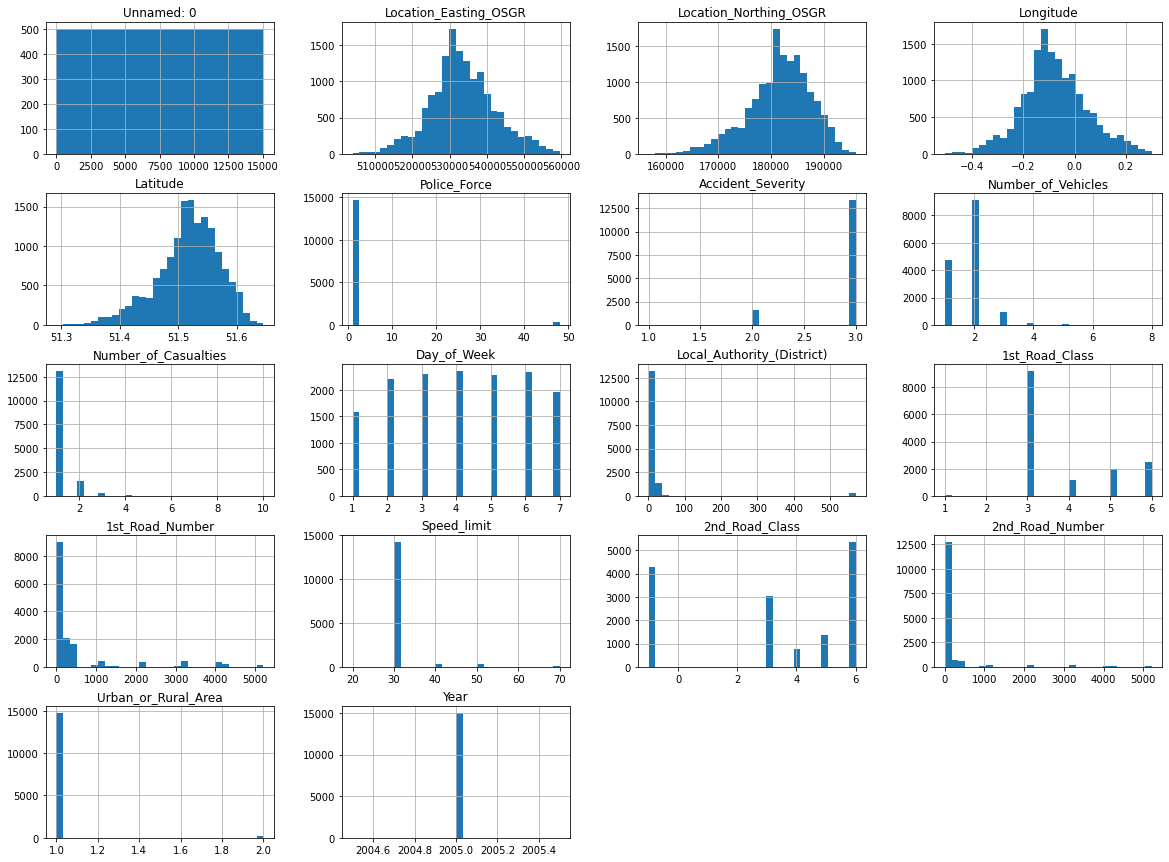

In [3]:
data.hist(bins=30, figsize=(20,15))
plt.show()

/Users/thilokthama/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


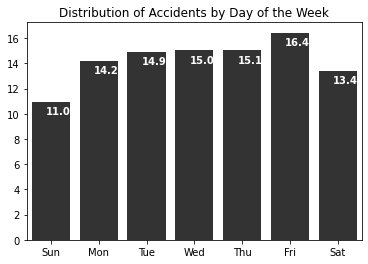

In [5]:

# calculate proportion of accidents for each day of the week.
#The distribution of accidents by day of the week looks a bit more interesting -
#more accidents happened in the weekend.
# working days have a higher number of accidents, and more  of overall accidents occurred on Friday.
import seaborn as sns
Week_Days = data["Day_of_Week"].value_counts().sort_index()/len(data)*100
Week_Days.index = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
sns.barplot(Week_Days.index, Week_Days.values, alpha=0.8, color="black")
plt.title("Distribution of Accidents by Day of the Week")
for i, val in enumerate(Week_Days.values):
    plt.text(i-0.1, val-1,  str( "{:.{}f}".format( val, 1 )), color='white', fontweight='bold')



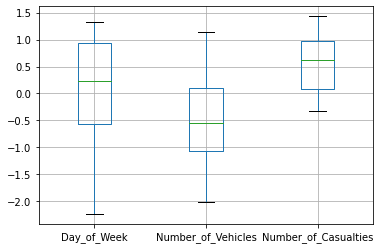

In [12]:
dataframe = pd.read_csv("C:\\Users\\Dell\\Desktop\\UTD\\OOPS\\UK_Accident.csv")
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 3),
                  columns=['Day_of_Week', 'Number_of_Vehicles', 'Number_of_Casualties'])

boxplot = df.boxplot(column=['Day_of_Week', 'Number_of_Vehicles', 'Number_of_Casualties'])  



Our dataset is :  [[0.80214764 0.14376682 0.70426097 0.70458131 0.21879211]
 [0.92486763 0.44214076 0.90931596 0.05980922 0.18428708]
 [0.04735528 0.67488094 0.59462478 0.53331016 0.04332406]
 [0.56143308 0.32966845 0.50296683 0.11189432 0.60719371]
 [0.56594464 0.00676406 0.61744171 0.91212289 0.79052413]]


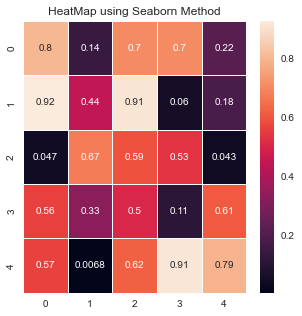

In [7]:
# 1. Import Modules
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")
 
# 2. Generate a 5x5 random integer matrix
data = np.random.rand(5,5)
print("Our dataset is : ",data)
 
# 3. Plot the heatmap
plt.figure(figsize=(5,5))
heat_map = sns.heatmap( data, linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

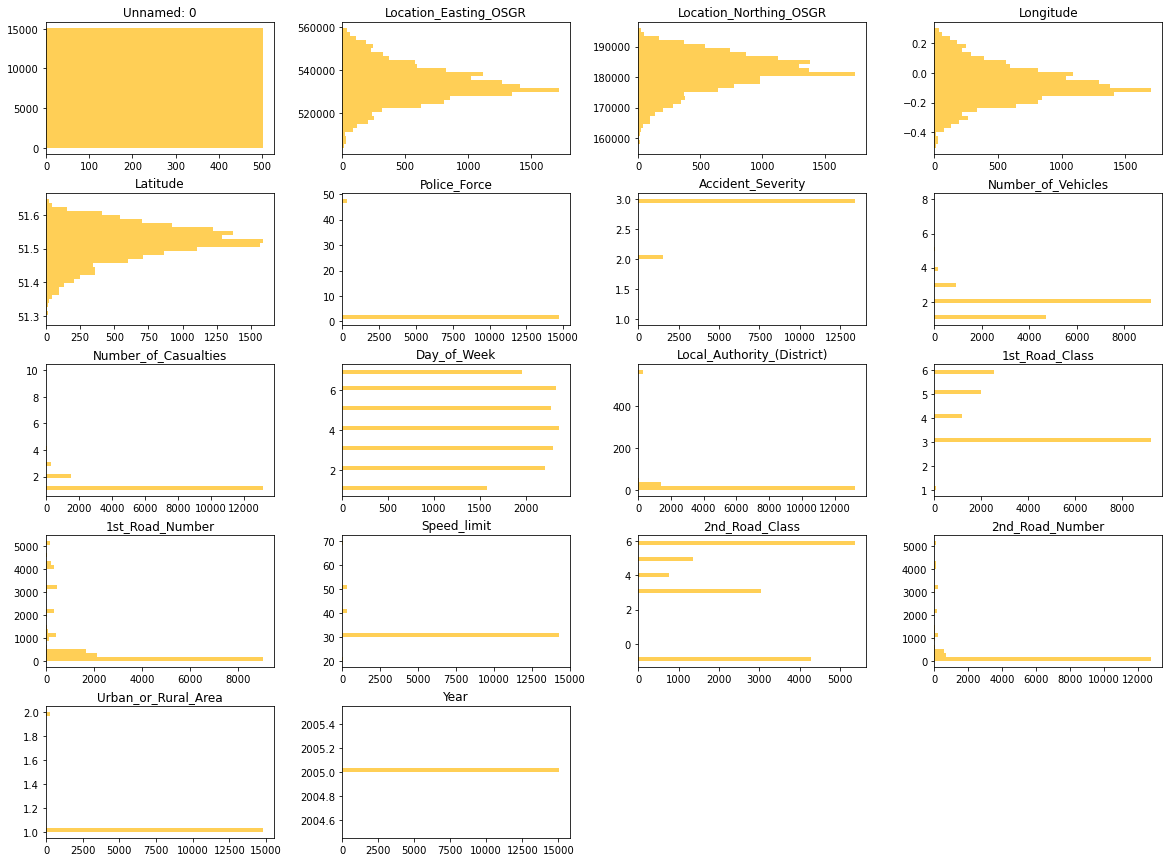

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

data.hist(bins=30, figsize=(20,15), grid=False,  orientation='horizontal', color='#FFCF56');



Text(0, 0.5, 'Date')

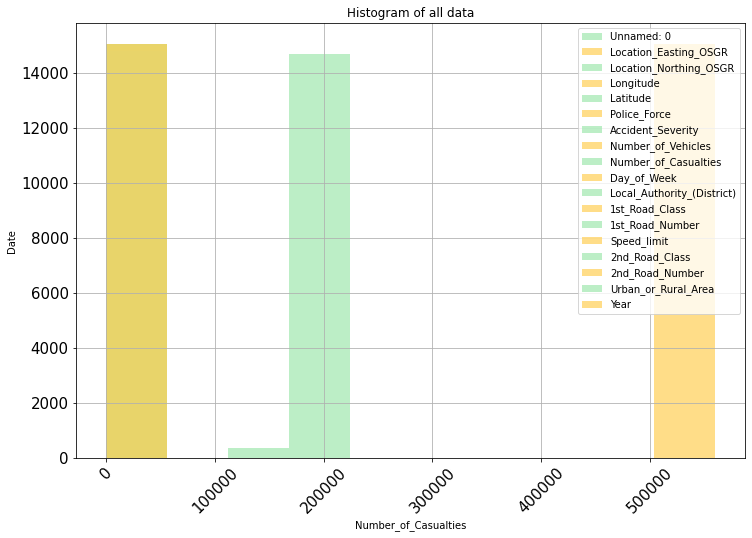

In [21]:
data.plot(kind='hist', alpha=0.7, title='Histogram of all data', rot=45, grid=True, figsize=(12,8), fontsize=15,
         color=['#A0E8AF', '#FFCF56'])
plt.xlabel('Number_of_Casualties')
plt.ylabel('Date')

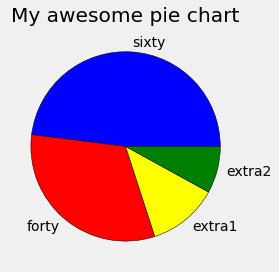

In [41]:
plt.style.use("fivethirtyeight")
slices=[120,80,30,20]
labels=['sixty', 'forty', 'extra1', 'extra2']
colors=['blue','red','yellow','green']
plt.pie(slices, labels=labels,colors=colors, wedgeprops={'edgecolor':'black'})

plt.title("My awesome pie chart")
plt.tight_layout()
plt.show()